<a href="https://colab.research.google.com/github/Sinrez/pyCoursera/blob/master/SII_Lab_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа №1 ##

### Задание №1: Разработать программу на языке Python, генерирующую определённый набор данных.
Характеристика набора данных определяются согласно варианту. Число классов равно двум (трём, если хотите выполнить задание повышенной сложности), число элементов в классе N (согласно варианту), распределение значений в каждом классе – нормальное, данные двумерные (используются только два признака). Классификатор – логистическая регрессия. Разбиение выборки 50%/50% (половина данных используется для обучения классификатора, половина для оценки ошибки классификации). Точность классификации набора данных с использованием логистической регрессии должна попадать в диапазон, соответствующий варианту. <br>
Результаты, которые необходимо получить в итоге:
1. Параметры генерации данных, обеспечивающие выполнение задания.
2. Графическое представления расположения набора данных (двумерный график, в котором каждый класс обозначен своим цветом).
3. Значение точности классификации.

### Задание №2: Реализовать предикции по аналогии с классификатором "логистическая регрессия".
Пункты задания (алгоритм):
1. Выполнить обучение классификатора из пакета sklearn на обучающей выборки.
2. Вывести параметры, определенные классификатором для различения набора данных.
3. Реализовать функцию, определяющую принадлежность вектора признаков определённому классу с использованием значений параметров, полученных в пункте 2.
4. Провести классификацию тестовой части выборки как с использованием классификатора из пакета sklearn, так и с использованием своей реализации (функция из пункта 3). 
5. Сравнить результаты.

### Генерация данных и анализ с использованием логистической регрессии ###

In [2]:
#Импорт библотек
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Подключения модуля для отрисовки графиков непосредственно в интерфейсе
%matplotlib inline

### Инициализация вектора с использованием заданных значений

In [ ]:
x = np.array([2,7,5])    
x

array([2, 7, 5])

### Инициализация вектора с использованием стандартных методов

In [ ]:
y = np.arange(4)
y

array([0, 1, 2, 3])

In [ ]:
y = np.arange(4, 13)
y

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
y = np.arange(4, 13, 3)
y

array([ 4,  7, 10])

In [ ]:
y = np.arange(13, 4, -3)
y

array([13, 10,  7])

### Операции над векторами

In [ ]:
x * y    # Перемножение

array([26, 70, 35])

In [ ]:
x + y    # Сложение

array([15, 17, 12])

In [ ]:
x / y    # Делене

array([0.15384615, 0.7       , 0.71428571])

In [ ]:
x ** y   # Возведение в степень

array([     8192, 282475249,     78125])

In [ ]:
x.dot(y) # Скалярное произведение

131

### Обращение к элементам вектора

In [ ]:
x[1]    # Выбор элемента в определённой позиции

7

In [ ]:
x[1:3]  # Выбор нескольких элементов

array([7, 5])

In [ ]:
x[-2]  # Можно выбрать элемент, указав его позицию "с конца"

7

In [ ]:
x[np.array([0,1])]  # Можно задать позицию элементов как вектор

array([2, 7])

In [ ]:
x[[0,1]]

array([2, 7])

### Матрицы

In [ ]:
Z = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
Z

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
Z.shape # Размерность матрицы

(3, 3)

In [ ]:
Z = np.arange(1, 10, 1).reshape(3, 3)
Z

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
Z[2:4, 1:3]    # Индексы считаться с 0

array([[8, 9]])

In [ ]:
Z[:, 1:3]    # По всем строкам

array([[2, 3],
       [5, 6],
       [8, 9]])

## Генерация данных с заданным распредлением ###

### Равномерное распределение

In [4]:
x = np.random.uniform(0.0, 2.0, 527) # (Левая граница, Правая граница, Число элементов)
x

array([1.8341094 , 0.60984451, 1.86722387, 0.87621922, 0.6564688 ,
       1.65765825, 1.15060716, 0.81708821, 1.86395669, 0.47082545,
       1.66327058, 0.72129089, 1.88834803, 0.67105411, 0.03053724,
       0.09981665, 0.69414724, 0.07181467, 1.01932658, 1.3112808 ,
       0.75551868, 0.09138663, 0.24491212, 1.75929719, 1.72905549,
       0.47266552, 0.64282274, 1.94175496, 0.81656253, 1.64018903,
       0.33776706, 0.17423209, 1.09953521, 1.39027629, 0.46076825,
       1.0638897 , 0.4540175 , 1.97516562, 0.38912298, 1.12801046,
       1.0134519 , 1.45841942, 0.40434718, 0.80151851, 1.36303339,
       1.46858736, 0.38902846, 1.08581695, 0.42471928, 1.00618194,
       0.68743212, 1.72102614, 0.6814047 , 1.40155186, 1.42150309,
       0.24116287, 1.25141253, 0.96653381, 1.94054313, 1.33193234,
       1.37048715, 1.89497416, 1.21706265, 1.67293687, 0.71696527,
       0.36572753, 0.74086908, 0.83138222, 0.52504072, 0.32101228,
       1.53141013, 0.56082841, 0.51774561, 1.57003215, 0.83971

### Нормальное распределение

In [5]:
y = np.random.normal(0.0, 2.0, 527) # (Среднее, СКО, Число элементов)
y

array([-2.49207567, -0.53894481, -1.18865777,  4.06876896, -0.43129442,
       -0.73837404,  1.1054215 ,  1.11148345, -3.23169627,  2.77005585,
        1.80062243,  1.54198443, -1.96948556, -0.20460529, -2.14338296,
       -0.76977293, -2.03854314,  0.60446493, -0.28872103,  1.02638156,
       -0.34450275,  0.70287173, -0.59953434, -1.9657826 , -1.34222763,
       -3.90119736,  2.70351687, -2.64079748,  1.64211433, -3.06298845,
       -1.13729441, -1.0284777 , -0.36980928,  3.96401282,  0.56170939,
        2.88723644,  1.20427323,  1.23108228, -0.18145751,  0.46093351,
       -2.13696758, -2.53887758, -0.7288105 ,  2.73950687, -0.36755576,
        1.01049943,  0.28472006, -0.25865937, -2.90007593,  1.69215346,
        1.82977322,  0.37541408,  4.11447028, -0.11258912,  2.85286963,
        0.13270261,  3.26663502,  1.15969639,  0.4429478 ,  0.35361527,
        0.77168142,  0.9331257 , -2.95010694, -0.05780088,  2.63869656,
       -0.44040039, -3.66791922,  2.24546772,  2.17960725, -4.26

### Визуализация точек с использованием графиков

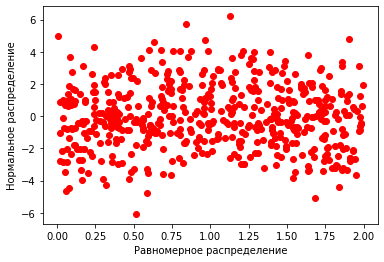

In [6]:
plt.xlabel("Равномерное распределение")
plt.ylabel("Нормальное распределение")
plt.scatter(x, y, marker='o', color='red')  # Настройки отображения графика

### Гистограмма

(array([  2.,  11.,  56.,  76., 142., 110.,  69.,  43.,  16.,   2.]),
 array([-6.0637897 , -4.83715967, -3.61052963, -2.38389959, -1.15726955,
         0.06936049,  1.29599053,  2.52262056,  3.7492506 ,  4.97588064,
         6.20251068]),
 <BarContainer object of 10 artists>)

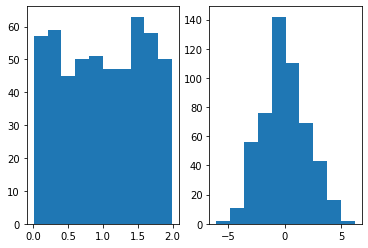

In [7]:
plt.subplot(121)    # Выбор области для визуализации
plt.hist(x)
plt.subplot(122)
plt.hist(y)

## Generate two Gaussian clouds

### Генерация наборов данных с нормальным распределением

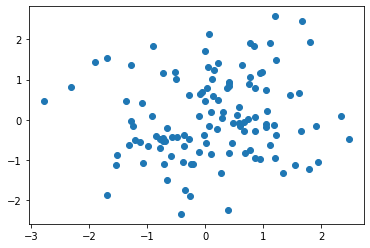

In [8]:
noise = np.random.randn(120, 2) # 120 точек, 2 координаты
plt.scatter(noise[:,0], noise[:,1])

### Сдвижка наборов данных

In [157]:
# cloud1 = noise + np.array([1, 1])
# cloud2 = noise + np.array([-1, -1])
cloud1 = noise + np.array([1, 1])
cloud2 = noise + np.array([-2, -1])

In [158]:
cloud1.shape, cloud2.shape

((120, 2), (120, 2))

In [159]:
XY = np.vstack([cloud1, cloud2])
XY.shape

(240, 2)

In [160]:
annotation1 = [0]*120 # Создание списка с 120 нулями (метки первого класса)
print(annotation1)
annotation2 = [1]*120 # Создание списка с 120 единицами (метки второго класса)
print(annotation2)
annotations = annotation1 + annotation2 # объединения списков
print(annotations)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

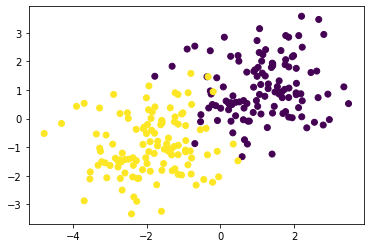

In [161]:
plt.scatter(XY[:,0], XY[:,1], c=annotations) # отрисовка точек с заданными метками (каждая метка своего цвета)

### Вычисление среднего и СКО для каждого облака точек

In [162]:
print(cloud1.mean())
print(cloud1.std())
print(cloud1.mean(axis=0))

1.082693811685371
1.0045020996438574
[1.11583628 1.04955135]


In [163]:
print(cloud2.mean())
print(cloud2.std())
print(cloud2.mean(axis=0))

-1.417306188314629
1.107195557524688
[-1.88416372 -0.95044865]


# Библиотека sklearn. Логистическая регрессия

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

#### В роли набора данных будем использовать облака точек, которые сгененировали ранее

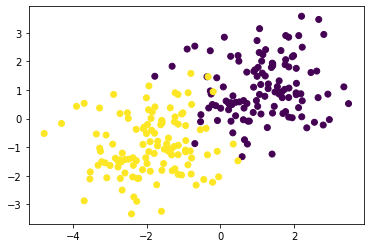

In [165]:
plt.scatter(XY[:,0], XY[:,1], c=annotations) # mark each point with a certain color

#### Перемешаем данные

In [166]:
data, labels = shuffle(XY, annotations)

#### Разделим данные на обучающие и тестовые

In [167]:
test_size = int(len(data) * 0.4)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

(array([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 64.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

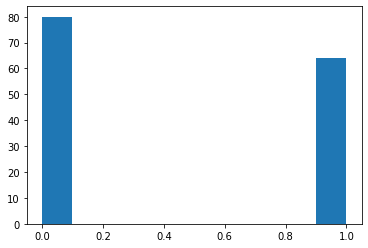

In [168]:
plt.hist(Ytest)

#### Создадим и обучим классификатор на обучающем наборе данных

In [169]:
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)

LogisticRegression()

#### Оценим точность на тестовом наборе данных

In [170]:
predictions = clf.predict(Xtest) #Определим метки классов для тестовых данных

In [171]:
accuracy_score(Ytest, predictions) #Оценим точность определения меток

0.9583333333333334

In [172]:
confusion_matrix(Ytest, predictions) #Оценим точность определения меток

array([[77,  3],
       [ 3, 61]])

### Подсказки для задания №2

In [ ]:
clf.coef_

array([[-1.22230123, -2.10704223]])

In [ ]:
clf.intercept_

array([-1.22484262])

In [ ]:
x=5
np.exp(x)/(np.exp(x)+1)

0.9933071490757152